# 1. Business Understanding

This dataset was created to find correlations between alcohol and a various number of other characteristics. The orignal intent was to measure alcohol consumption vs. performance in secondary school. However, we can also use the data collected to see if there are certains factors (such as parental education, parental relationship, failures) that correlate with the consumption of alcohol.

This data is important because if we find correlations between life circumstance and alcohol consumption, then others could use the analysis to provide help or even preemptively intervene before a problem arises. This knowledge will be useful if a strong correlation does exist. If there is no strong correlation, the analysis will still be useful because it would show that life circumstances does not affect the decision to drink alcohol (or amount) heavily enough to be a conclusive factor.

# 2. Data Understanding

In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv("student/student-data.csv")

print(df.dtypes)

sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
guardian      object
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
dtype: object


The data types are represented as indicated below:

- sex - student's sex (binary: 'F' - female or 'M' - male) 
- age - student's age (numeric: from 15 to 22) 
- address - student's home address type (binary: 'U' - urban or 'R' - rural) 
- famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3) 
- Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart) 
- Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education) 
- Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education) 
- Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
- Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
- guardian - student's guardian (nominal: 'mother', 'father' or 'other') 
- studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 ->10 hours) 
- failures - number of past class failures (numeric: n if 1<=n<3, else 4) 
- schoolsup - extra educational support (binary: yes or no) 
- famsup - family educational support (binary: yes or no) 
- paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no) 
- activities - extra-curricular activities (binary: yes or no) 
- nursery - attended nursery school (binary: yes or no) 
- higher - wants to take higher education (binary: yes or no) 
- famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent) 
- freetime - free time after school (numeric: from 1 - very low to 5 - very high) 
- goout - going out with friends (numeric: from 1 - very low to 5 - very high) 
- Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high) 
- Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) 
- health - current health status (numeric: from 1 - very bad to 5 - very good) 
- absences - number of school absences (numeric: from 0 to 93) 

source: http://archive.ics.uci.edu/ml/datasets/STUDENT+ALCOHOL+CONSUMPTION

## Reasons for Attributes ♥♥♥

We are analyzing 3 main subsets:

1. Personal information such as sex, age, address.
2. Family circumstances and relations such as family relationships, marital status, parents' employment.
3. Academic work ethic and aspiration such as study time, plans for higher education and absences.


## Data Quality
There were no missing values or duplicates in the dataset. 

In [18]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 25 columns):
sex           1044 non-null object
age           1044 non-null int64
address       1044 non-null object
famsize       1044 non-null object
Pstatus       1044 non-null object
Medu          1044 non-null int64
Fedu          1044 non-null int64
Mjob          1044 non-null object
Fjob          1044 non-null object
guardian      1044 non-null object
studytime     1044 non-null int64
failures      1044 non-null int64
schoolsup     1044 non-null object
famsup        1044 non-null object
paid          1044 non-null object
activities    1044 non-null object
nursery       1044 non-null object
higher        1044 non-null object
famrel        1044 non-null int64
freetime      1044 non-null int64
goout         1044 non-null int64
Dalc          1044 non-null int64
Walc          1044 non-null int64
health        1044 non-null int64
absences      1044 non-null int64
dtypes: int64(12), object(13)


# 3. Data Visualization

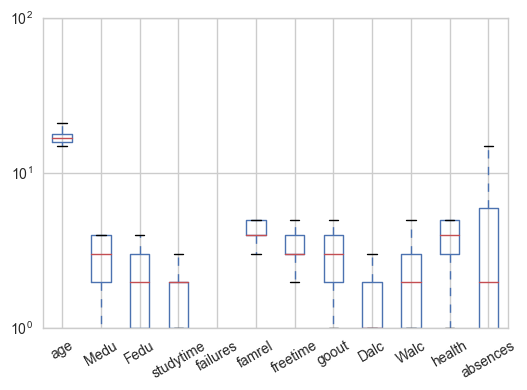

In [23]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

ax = df.boxplot(return_type='axes', rot=30)
ax.set_yscale('log')

From this graph, we can see that there is a wider variety of female parent education (Fedu) than male parent education(Medu). Furthermore, there are a much wider variety of students that drink over the weekend (Walc) than over ther weedays (Dalc) in addition to more students that drink over the weekend.

## Data Correlation

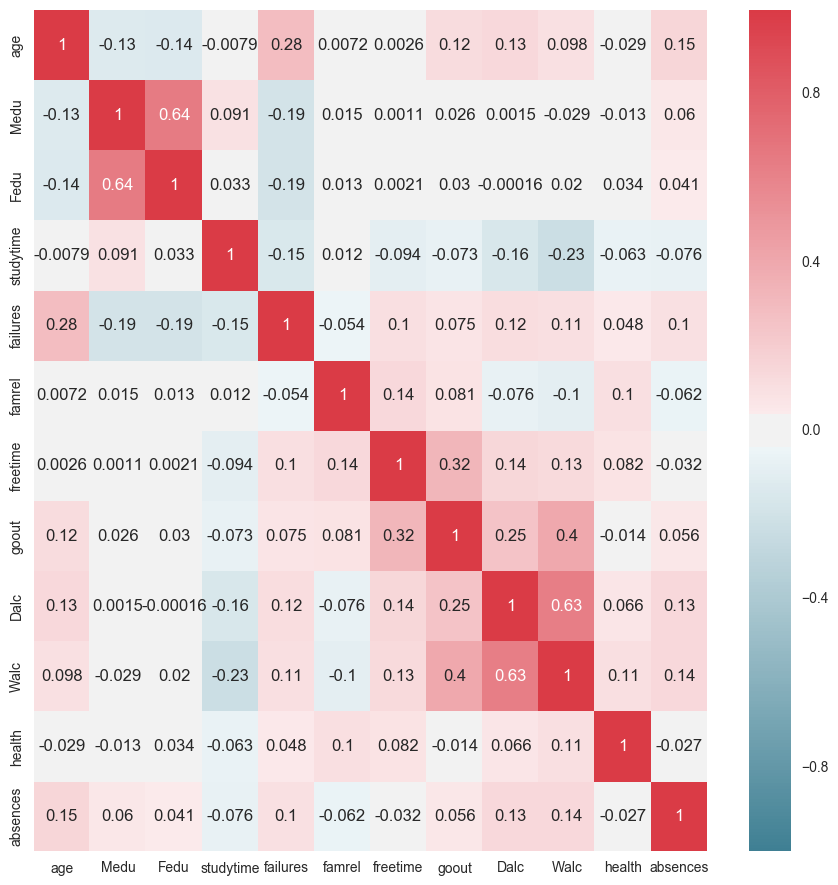

In [9]:
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(9, 9))

sns.heatmap(df.corr(), cmap=cmap, annot=True)

f.tight_layout()

**Failures and Age**

There is a strong correlation between failures and age. This makes sense because students who fail more and are held back will have a higher age than students who do not fail as many classes.

**Failures and Mother/Father's Education**

Though not strong, there exists a negative correlation between failures and the level of parent's education. Those who have more educated parents' are less likely to fail.

**Going out and Freetime**

There exists a correlation between going out (goout) and free time (freetime). Students that go out more have more free time, and students that have more free time go out often too but there is more variation in how often they go out

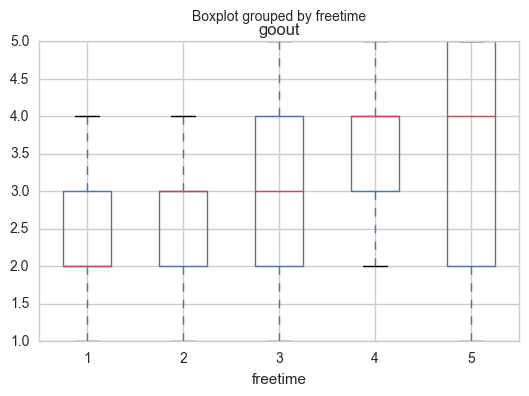

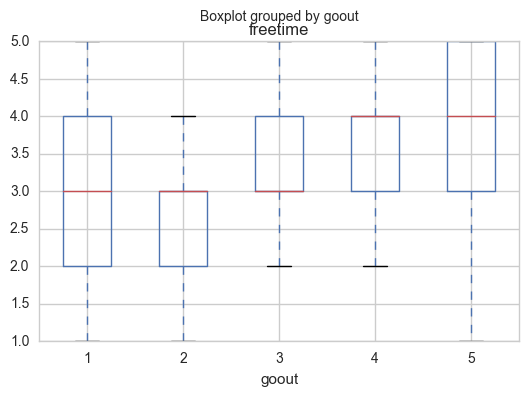

In [30]:
df.boxplot(column="goout", by="freetime")
df.boxplot(column="freetime", by="goout")

**Going out and Weekend Alcohol**

People who go out more than average tend to drink an average amount of alcohol on the weekends. However, those with a go out rating of 4 have a range that extends from very low to high (score: 1 - 4), while those with a go out rating of 5 have a range that extends from low to very high (score: 2 - 5). Still, the medians of the go out ratings of 4 and 5 are the same.
Those who go out very low and low drink little to no alcohol on the weekends with the median being very low.

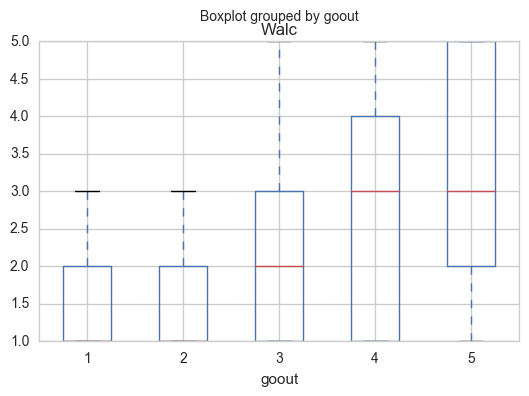

In [33]:
df.boxplot(column="Walc", by="goout")

**Weekday Alcohol and Weekend Alcohol**

There is a strong correlation between weekday drinking (Dalc) and weekend drinking (Walc). Those who don't drink much on the weekends also don't drink much on the weekdays. Even though there are some that drink very often on the weekends, the median is still average to low for weekday drinking.

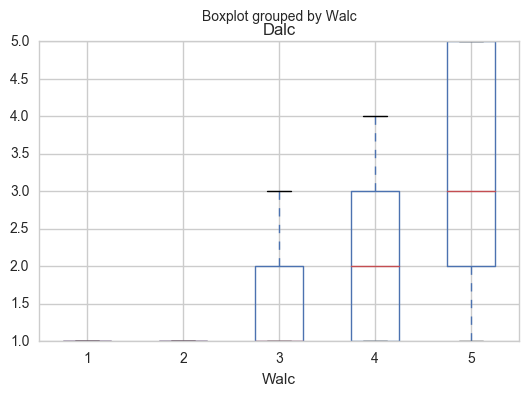

In [35]:
df.boxplot(column="Dalc", by="Walc")

**Father's Education and Mother's Education**

There is a strong correlation between father's and mother's education. Fathers who are educated typically have a spouse who is at least as educated as them if not more. 

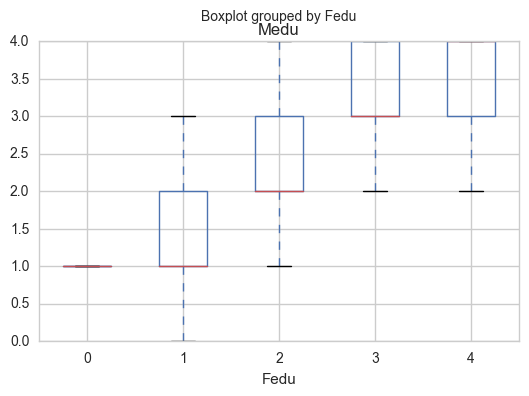

In [43]:
df.boxplot(column="Medu", by="Fedu")

**Study Time and Weekend Alcohol Consumption**

There is a significant negative correlation between study time and weekend alcohol consumption. Those who study more tend to drink less, especially with those who study four or more hours a week.

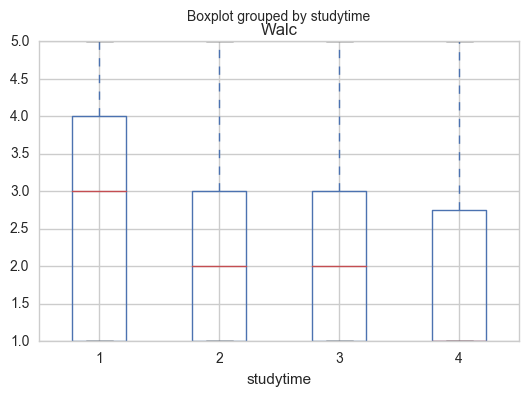

In [44]:
df.boxplot(column="Walc", by="studytime")